<a href="https://colab.research.google.com/github/MIHIR-110103/ML-Models/blob/main/Decision_Tree_Classification_(Brest_Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/sample_data/Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.diagnosis.unique()

array([0, 1])

In [ ]:
X=data.drop(["diagnosis"],axis=1)
Y=data["diagnosis"]

In [ ]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#n=int(input("Enter max depth value: "))

In [ ]:
clf=DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_train_pred=clf.predict(X_train)


In [ ]:
y_test_pred=clf.predict(X_test)


In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 90.37
|   |--- feature_2 <= 85.17
|   |   |--- feature_1 <= 23.47
|   |   |   |--- feature_1 <= 18.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  18.12
|   |   |   |   |--- feature_1 <= 18.16
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  18.16
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  23.47
|   |   |   |--- feature_4 <= 0.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.10
|   |   |   |   |--- feature_0 <= 12.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  12.01
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  85.17
|   |   |--- feature_1 <= 19.61
|   |   |   |--- feature_4 <= 0.13
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.13
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  19.61
|   |   |   |--- feature_4 <= 0.09
|   |   |   |   |--- feature_2 <= 85.86
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  85.86
|   |   |   |  

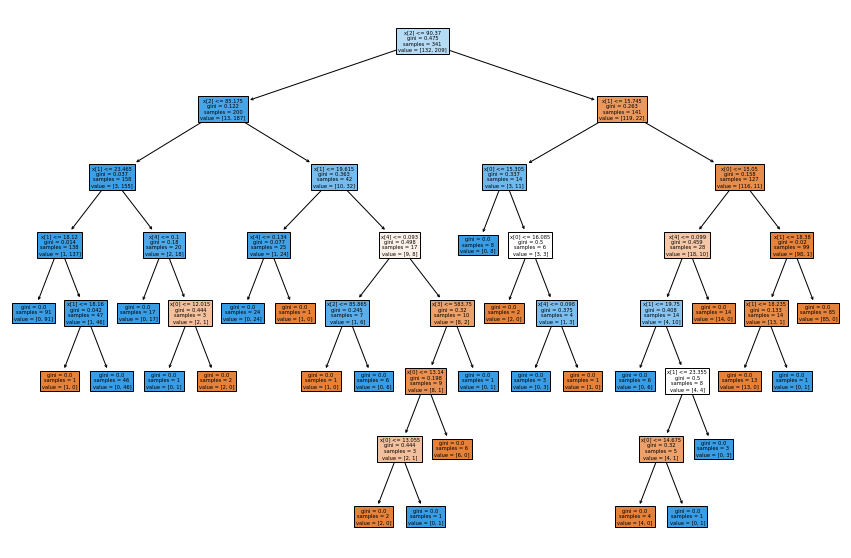

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, filled=True)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
print(f"training score = {accuracy_score(Y_train,y_train_pred)}")

training score = 1.0


In [ ]:
cm=confusion_matrix(Y_train,y_train_pred,labels=clf.classes_)

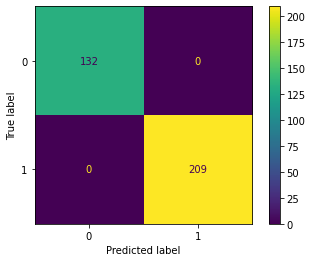

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(f"testing score = {accuracy_score(Y_test,y_test_pred)}")

testing score = 0.9035087719298246


In [ ]:
cm=confusion_matrix(Y_test,y_test_pred,labels=clf.classes_)

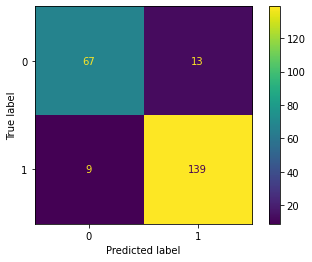

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.94      0.91      0.93       152

    accuracy                           0.90       228
   macro avg       0.89      0.90      0.89       228
weighted avg       0.91      0.90      0.90       228



In [ ]:
maxdepth=[]
for i in range(1,10):
  maxdepth.append(i)

maxdepth

[1, 2, 3, 4, 5, 6, 7, 8, 9]

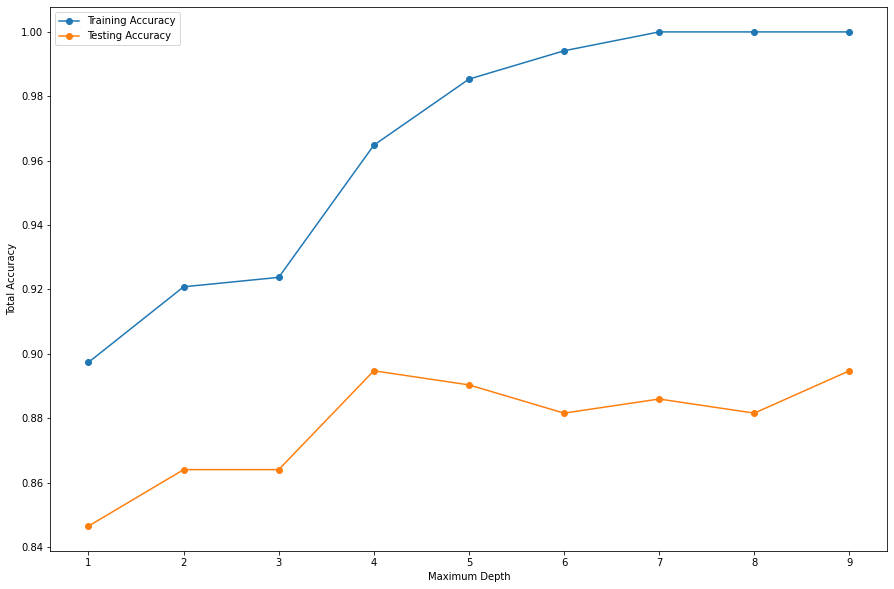

In [ ]:
train=[]
test=[]
for x in maxdepth:
  dtc =DecisionTreeClassifier(max_depth=x)
  dtc.fit(X_train,Y_train)

  y_train_pred = dtc.predict(X_train)
  train_z_prob = dtc.predict_proba(X_train)[:,1]

  y_test_pred = dtc.predict(X_test)
  test_z_prob = dtc.predict_proba(X_test)[:,1]

  train.append(accuracy_score(Y_train, y_train_pred))
  test.append(accuracy_score(Y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth)) + 1 # Create domain for plot
plt.plot(x, train, label='Training Accuracy',marker="o") # Plot training error over domain
plt.plot(x, test, label='Testing Accuracy',marker="o") # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

Decision Tree Post-Pruning

Taking max depth as 1 to minimize training testing accuracy difference

In [ ]:
n=int(input("Enter max depth value:"))

Enter max depth value:1


In [ ]:
clf=DecisionTreeClassifier(max_depth=n,random_state=0)

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
y_train_pred=clf.predict(X_train)

In [ ]:
y_test_pred=clf.predict(X_test)

In [ ]:
from sklearn import tree

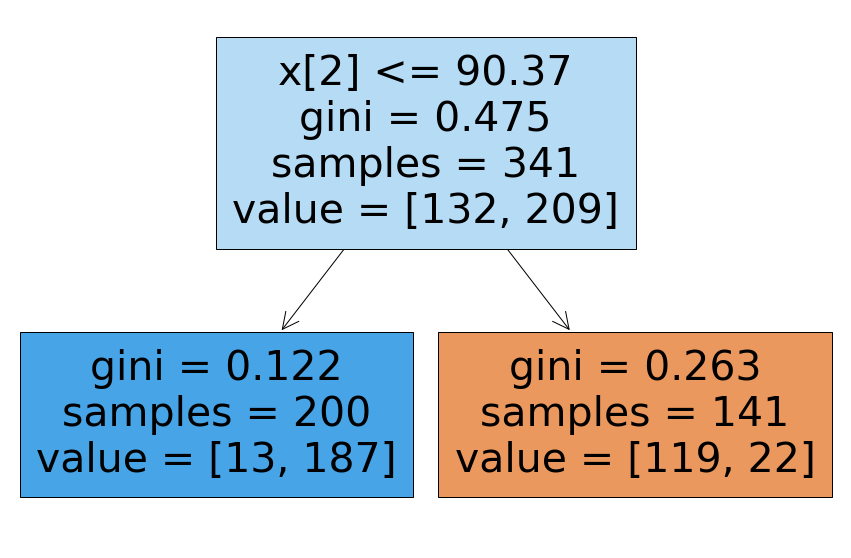

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, filled=True)

In [ ]:
print(f"training score = {accuracy_score(Y_train,y_train_pred)}")

training score = 0.8973607038123167


In [ ]:
cm=confusion_matrix(Y_train,y_train_pred,labels=clf.classes_)

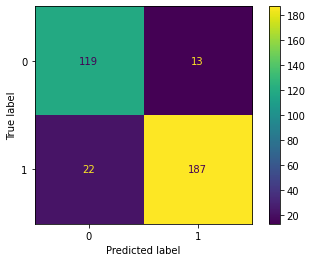

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(f"testing score = {accuracy_score(Y_test,y_test_pred)}")

testing score = 0.8464912280701754


In [ ]:
cm=confusion_matrix(Y_test,y_test_pred,labels=clf.classes_)

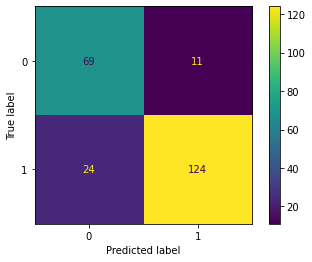

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        93
           1       0.84      0.92      0.88       135

    accuracy                           0.85       228
   macro avg       0.85      0.83      0.84       228
weighted avg       0.85      0.85      0.84       228

